In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch #to draw dendrogram
from sklearn.cluster import AgglomerativeClustering #for model building
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
# To find the total no. of null values in columns
df.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
df = df.iloc[:,1:]

In [8]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['Rape'] = LE.fit_transform(df['Rape'])

In [9]:
#df['Murder'].unique()
#df['Assault'].unique()
#df['UrbanPop'].unique()
df['Rape'].unique()

array([26, 46, 40, 21, 45, 44,  6, 13, 41, 33, 23, 10, 31, 25,  8, 19, 15,
       28,  1, 37, 43, 11, 18, 38, 16, 17, 47,  4, 20, 42, 34, 14,  0, 27,
       22, 39,  2, 29,  9, 36, 32, 30,  7, 24, 35,  3,  5, 12],
      dtype=int64)

In [10]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [11]:
# To check correlation
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.625828
Assault,0.801873,1.000000,0.258872,0.688542
UrbanPop,0.069573,0.258872,1.000000,0.438389
Rape,0.625828,0.688542,0.438389,1.000000


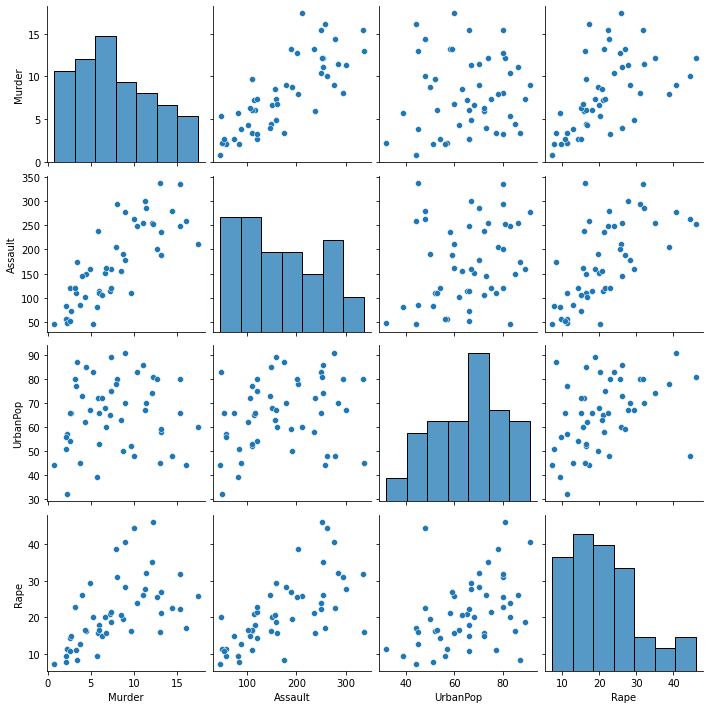

In [6]:

sns.pairplot(df)
plt.show()

In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.553191
1,0.554217,0.746575,0.271186,0.978723
2,0.439759,0.852740,0.813559,0.851064
3,0.481928,0.496575,0.305085,0.446809
4,0.493976,0.791096,1.000000,0.957447
5,0.427711,0.544521,0.779661,0.936170
6,0.150602,0.222603,0.762712,0.127660
7,0.307229,0.660959,0.677966,0.276596
8,0.879518,0.993151,0.813559,0.872340
9,1.000000,0.568493,0.474576,0.702128


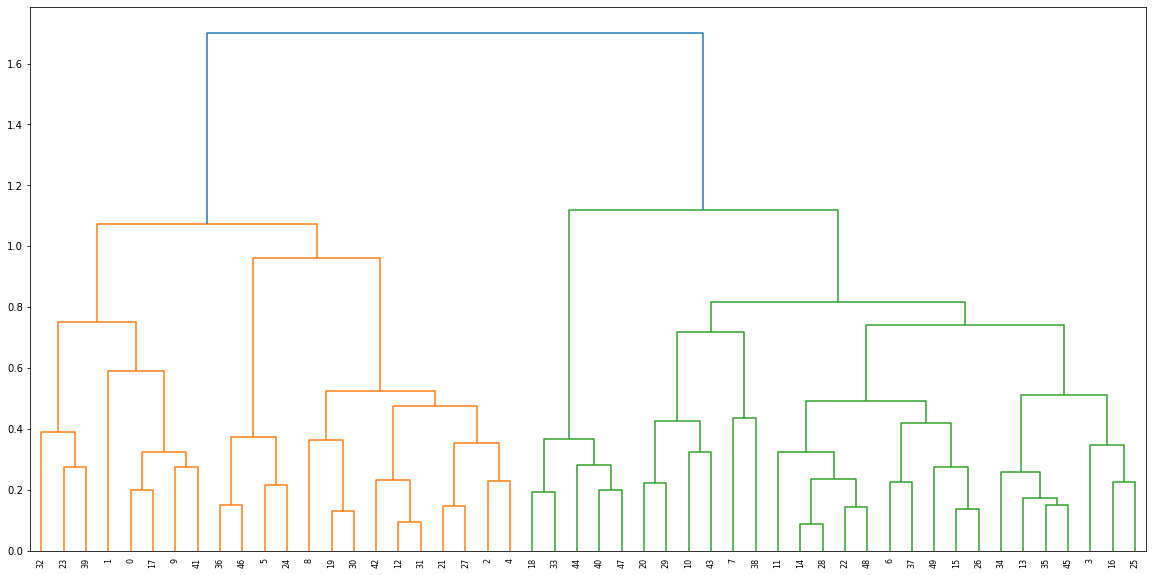

In [14]:
# create dendrogram
plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [15]:
# create clusters
hc = AgglomerativeClustering(n_clusters = 5,
                             affinity = 'euclidean',
                             linkage = 'complete')

In [16]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([1, 1, 3, 0, 3, 4, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 1, 2, 3, 0, 3,
       0, 1, 4, 0, 0, 3, 0, 0, 3, 3, 1, 2, 0, 0, 4, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 4, 2, 0, 0], dtype=int64)

In [18]:
# creating cluster ID
df['h_clusterid'] = y_hc

In [19]:
df1 = df.sort_values("h_clusterid")
df1.iloc[:,[0,-1]].head()

,Murder,h_clusterid
49,6.8,0
26,4.3,0
22,2.7,0
28,2.1,0
20,4.4,0


In [20]:
df['h_clusterid'].unique()

array([1, 3, 0, 4, 2], dtype=int64)

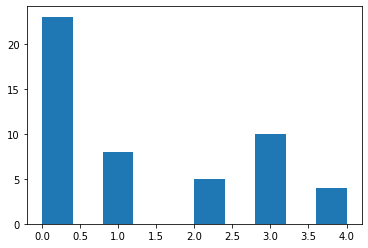

In [21]:
import matplotlib.pyplot as plt
plt.hist(df['h_clusterid'])
plt.show()

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

In [22]:
#standardized Dataset using scale
array = df.values

In [23]:
#standardized Dataset using scale
array = df.values

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
scaled = scale(array)
scaled

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-0.57702994, -1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-1.20322802, -0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.60578867,  0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.13637203, -0.70012057, -0.0

In [25]:
# Standardization of data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.79078716, -0.52619514,  0.21260493, -0.19791075],
       [ 1.11805959, -1.22406668,  1.66880306, -0.19791075],
       [ 1.49381682,  1.00912225,  1.23194362,  1.21573747],
       [ 0.23321191, -1.08449238, -0.15144461, -0.90473486],
       [ 1.2756352 ,  1.77678094,  1.59599315,  1.21573747],
       [ 0.40290872,  0.86954794,  1.52318324,  1.92256157],
       [-0.73648418,  0.79976079, -1.2435932 , -0.90473486],
       [ 0.81502956,  0.45082502, -0.73392386, -0.90473486],
       [ 1.99078607,  1.00912225,  1.30475352,  1.21573747],
       [ 0.48775713, -0.38662083,  0.72227427, -0.19791075],
       [-1.51224105,  1.21848371, -0.00582479, -0.90473486],
       [-0.61527217, -0.80534376, -0.95235358, -0.90473486],
       [ 0.94836277,  1.21848371,  0.57665446,  1.21573747],
       [-0.70012057, -0.03768506,  0.13979502, -0.90473486],
       [-1.39102904, -0.5959823 , -1.09797339, -0.90473486],
       [-0.67587817,  0.03210209, -0.29706442, -0.90473486],
       [-0.74860538, -0.

In [29]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [30]:
kmeans.inertia_

49.851433985840856

C:\Users\tanuc\desktop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


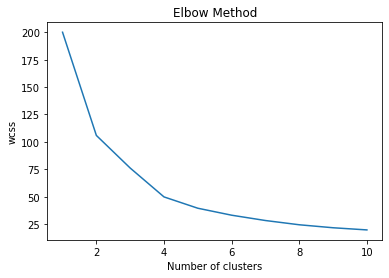

In [33]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [34]:
wcss

[200.0,
 105.90447880716357,
 76.18348683774381,
 49.851433985840856,
 39.53074532743696,
 33.17109645832079,
 28.321193926881833,
 24.44429255589137,
 21.726289210700042,
 19.756412368152954]

In [35]:
sil_score

[0.43697888935416535,
 0.3806648179446431,
 0.4104958952478167,
 0.41074698015337524,
 0.3696767149514934,
 0.36613022126672673,
 0.3577161407437345,
 0.3439692008532856,
 0.33856867498178184]

In [36]:
cal_haz_score

[42.64772432788403,
 38.19315943768886,
 46.18278408743498,
 45.66772268301631,
 44.25824009198567,
 43.44325242904088,
 43.0912141251879,
 42.052867792314714,
 40.5479799049159]

In [37]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state = 42)
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [38]:
clusters_new.labels_

array([1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 0, 2, 2, 1, 3, 0, 0, 2, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 2, 3, 0, 0])

In [39]:
#Assign clusters to the data set
df['clusterid_new'] = clusters_new.labels_

In [40]:
df[df['clusterid_new']==3]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new
11,2.6,120,54,10,0,3
14,2.2,56,57,8,0,3
16,9.7,109,52,15,0,3
18,2.1,83,51,1,2,3
25,6.0,109,53,16,0,3
28,2.1,57,56,4,0,3
33,0.8,45,44,0,2,3
40,3.8,86,45,9,2,3
44,2.2,48,32,7,2,3
47,5.7,81,39,3,2,3


<AxesSubplot:>

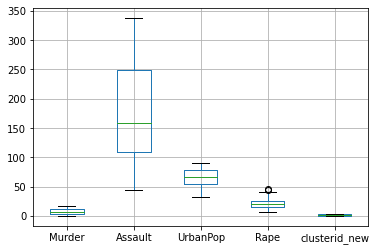

In [30]:
df.boxplot()

In [41]:
array = df.values

In [42]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [43]:
X

array([[ 1.25517927,  0.79078716, -0.52619514,  0.21260493, -0.19791075,
        -0.29769636],
       [ 0.51301858,  1.11805959, -1.22406668,  1.66880306, -0.19791075,
        -0.29769636],
       [ 0.07236067,  1.49381682,  1.00912225,  1.23194362,  1.21573747,
         0.57788117],
       [ 0.23470832,  0.23321191, -1.08449238, -0.15144461, -0.90473486,
        -0.29769636],
       [ 0.28109336,  1.2756352 ,  1.77678094,  1.59599315,  1.21573747,
         0.57788117],
       [ 0.02597562,  0.40290872,  0.86954794,  1.52318324,  1.92256157,
         0.57788117],
       [-1.04088037, -0.73648418,  0.79976079, -1.2435932 , -0.90473486,
        -1.17327388],
       [-0.43787481,  0.81502956,  0.45082502, -0.73392386, -0.90473486,
        -1.17327388],
       [ 1.76541475,  1.99078607,  1.00912225,  1.30475352,  1.21573747,
         0.57788117],
       [ 2.22926518,  0.48775713, -0.38662083,  0.72227427, -0.19791075,
        -0.29769636],
       [-0.57702994, -1.51224105,  1.21848371, -0.

In [44]:
#min_samples=4
dbscan = DBSCAN(eps = 5, min_samples = 6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [45]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [47]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [48]:
clustered = pd.concat([df, cl], axis=1)

In [49]:
clustered

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster
0,13.2,236,58,26,1,1,0
1,10.0,263,48,46,1,1,0
2,8.1,294,80,40,3,2,0
3,8.8,190,50,21,0,1,0
4,9.0,276,91,45,3,2,0
5,7.9,204,78,44,4,2,0
6,3.3,110,77,6,0,0,0
7,5.9,238,72,13,0,0,0
8,15.4,335,80,41,3,2,0
9,17.4,211,60,33,1,1,0


In [50]:
clustered[clustered['cluster'] == -1]

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusterid_new,cluster


In [51]:
clustered.mean()

Murder             7.788
Assault          170.760
UrbanPop          65.540
Rape              23.080
h_clusterid        1.280
clusterid_new      1.340
cluster            0.000
dtype: float64

In [52]:
p = clustered.iloc[:,-1]
q = clustered.iloc[:,-2]
r = clustered.iloc[:,-3]
#print(p)
#print(q)
#print(r)

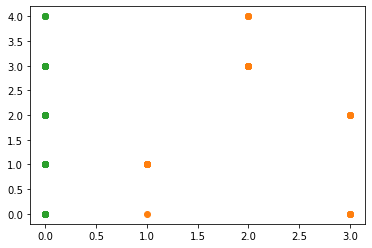

In [53]:
plt.scatter(p,q)
plt.scatter(q,r)
plt.scatter(p,r)
plt.show()